<a href="https://colab.research.google.com/github/NophaieViscente/AnalisandoDadosBrasileirao/blob/main/Analise_de_Dados_Campeonato_Brasileiro_2000_at%C3%A9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importando as bibliotecas e lendo os arqvuivos (.csv)

In [1]:
# Importando as bibliotecas que serão usadas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# Lendo os arquivos .csv e alocando em dois datasets
df_football = pd.read_csv('/content/drive/MyDrive/brazilian_football_championship_2000to2021.csv',encoding='latin1')
df_stats = pd.read_csv('/content/drive/MyDrive/stats_brazilian_football_championship2015to2021.csv',encoding='latin1')

### Agrupando os datasets. 



In [2]:
# Agrupando o dataset de estatísticas e o das partidas.
full_data = df_football.merge(df_stats,on='ID',how='left')
# Mostrando os arquivos agrupados.
full_data.head(-20)

,ID,Rodada,Data,Horário,Dia,Mandante_x,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Mandante_y,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10586,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,1.0,19.0,6.0,56%,471.0,82%,24.0,4.0,0.0,1.0,3.0
10587,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10588,8314,38,2021-02-25,21:30,Quinta-Feira,Atlético-MG,Palmeiras,Atlético-MG,Mineirão,2,0,MG,SP,MG,1.0,19.0,8.0,52%,451.0,89%,22.0,3.0,0.0,5.0,5.0


#### Editando dados para usar na análise.

In [3]:
# fazendo com que os dados 'Vencedor','Mandante_x','Visitante','Dia' fiquem no mesmo padrão .
full_data['Vencedor'] = full_data['Vencedor'].str.upper()
full_data['Mandante_x'] = full_data['Mandante_x'].str.upper()
full_data['Visitante'] = full_data['Visitante'].str.upper()
full_data['Dia'] = full_data['Dia'].str.upper()  

In [4]:
# Trocando dados de empates nas colunas 'Estado Vencedor' e 'Vencedor'
full_data['Estado Vencedor'] = full_data['Estado Vencedor'].replace('-','Empate')
full_data['Vencedor'] = full_data['Vencedor'].replace('-','Empate')

In [5]:
# Trocando tipo dos dados de data . 
full_data['Data'] = pd.to_datetime(full_data['Data'],format='%Y-%m-%d')

In [6]:
# Criando um DataFrame 'vencedor' para ter a contagem de vencedores de forma organizada e sem dados repetidos.
full_data_norepeat = full_data.drop_duplicates(subset='ID',keep='first')
vencedor = pd.DataFrame()
winners = full_data_norepeat['Vencedor'].value_counts()
vencedor['winners'] = winners.index
vencedor['winner_count'] = winners.values
# Retirando os empates.
vencedor.drop(index=0,inplace=True)
vencedor.head()

,winners,winner_count
1,SÃO PAULO,366
2,SANTOS,339
3,CRUZEIRO,326
4,INTERNACIONAL,323
5,GRÊMIO,322


In [7]:
# Criando novo dataset para alocar dados de 'Vencedores em casa' . 
homeWinners = full_data_norepeat.query('Vencedor == Mandante_x')
vencedorCasa = pd.DataFrame()
winners = homeWinners['Vencedor'].value_counts()
vencedorCasa['winners'] = winners.index
vencedorCasa['winner_count'] = winners.values
vencedorCasa.head()

,winners,winner_count
0,SÃO PAULO,230
1,SANTOS,229
2,GRÊMIO,223
3,ATHLÉTICO-PR,218
4,INTERNACIONAL,216


In [8]:
# Criando novo dataset para alocar dados de 'Vencedores visitantes' . 
awayWinners = full_data_norepeat.query('Vencedor == Visitante')
vencedorVisitante = pd.DataFrame()
winners = awayWinners['Vencedor'].value_counts()
vencedorVisitante['winners'] = winners.index
vencedorVisitante['winner_count'] = winners.values
vencedorVisitante.head()

,winners,winner_count
0,SÃO PAULO,136
1,CRUZEIRO,120
2,FLAMENGO,117
3,FLUMINENSE,113
4,SANTOS,110


In [9]:
# Criando novo dataSet para alocar os dados de Vencedores com suas Quantidades de gols em casa . 
placarMandante = homeWinners[['Vencedor','Mandante Placar']]
placarMandante = placarMandante.groupby('Vencedor').sum().sort_values('Mandante Placar',ascending=False)
golsMandante = pd.DataFrame()
golsMandante['time'] = placarMandante.index
golsMandante['gols_casa'] = placarMandante.values

In [10]:
# Criando novo dataSet para alocar os dados de Vencedores com suas Quantidades de gols fora de casa . 
placarVisitante = awayWinners[['Vencedor','Visitante Placar']]
placarVisitante = placarVisitante.groupby('Vencedor').sum().sort_values('Visitante Placar',ascending=False)
golsVisitante = pd.DataFrame()
golsVisitante['time'] = placarVisitante.index
golsVisitante['gols_fora'] = placarVisitante.values

#### Funções mais usadas para a análise.

In [11]:
def graficoContagemVertical (dados, x,hue, palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels,rotacaoLabelBarra) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.countplot(data=dados,x=x,hue=hue,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
  for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}'.format(altura),
            ha="center",va='bottom',rotation=rotacaoLabelBarra)
plt.show()

def graficoContagemHorizontal (dados, y,x,hue,orientacaoFigura,palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.barplot(data=dados,y=y,x=x,hue=hue,orient=orientacaoFigura,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'bottom']:
    ax.spines[axis].set_color(None)
  for valor in ax.patches :
    distancia = valor.get_width()
    ax.text(distancia,valor.get_y()+valor.get_height()/2.,
            '{:.0f}'.format(distancia),
            ha="left",va='center')
plt.show()

#### Analisando os dados

In [12]:
# Visualizando os dados . 
full_data.head(-20)
full_data_norepeat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 10606
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 8319 non-null   int64         
 1   Rodada             8319 non-null   object        
 2   Data               8319 non-null   datetime64[ns]
 3   Horário            7962 non-null   object        
 4   Dia                8319 non-null   object        
 5   Mandante_x         8319 non-null   object        
 6   Visitante          8319 non-null   object        
 7   Vencedor           8319 non-null   object        
 8   Arena              8319 non-null   object        
 9   Mandante Placar    8319 non-null   int64         
 10  Visitante Placar   8319 non-null   int64         
 11  Estado Mandante    8319 non-null   object        
 12  Estado Visitante   8319 non-null   object        
 13  Estado Vencedor    8319 non-null   object        
 14  Mandant

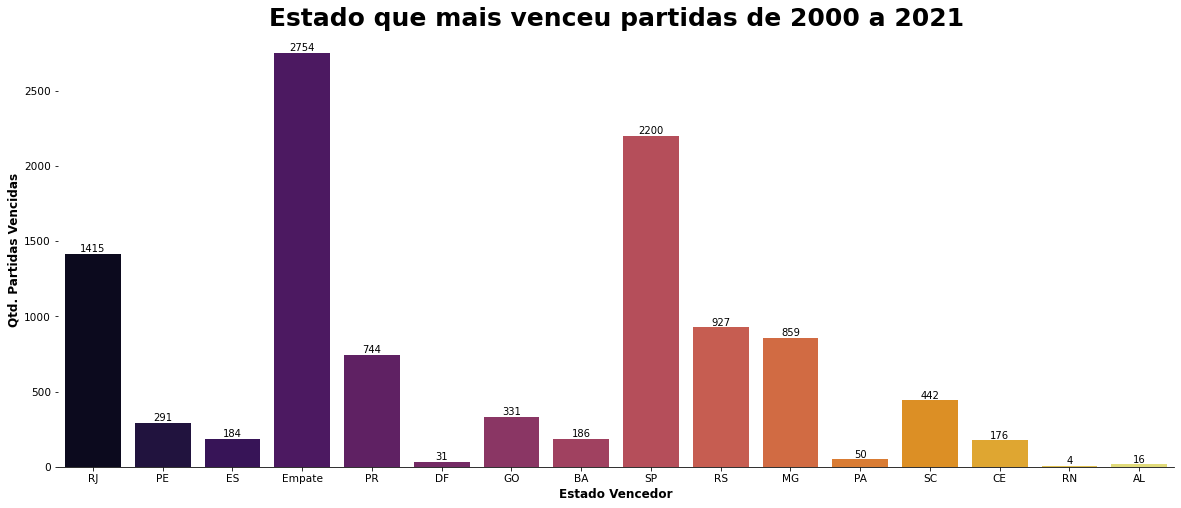

In [13]:
# Plotando gráfico para visualização do estado com maior número de vitórias.
graficoContagemVertical(full_data,x='Estado Vencedor',hue=None,palette='inferno',tamanhoFigura=(20,8),titulo='Estado que mais venceu partidas de 2000 a 2021',
                tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=10.5,rotacaoLabelBarra='horizontal')
plt.ylabel('Qtd. Partidas Vencidas',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.xlabel('Estado Vencedor',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.show()

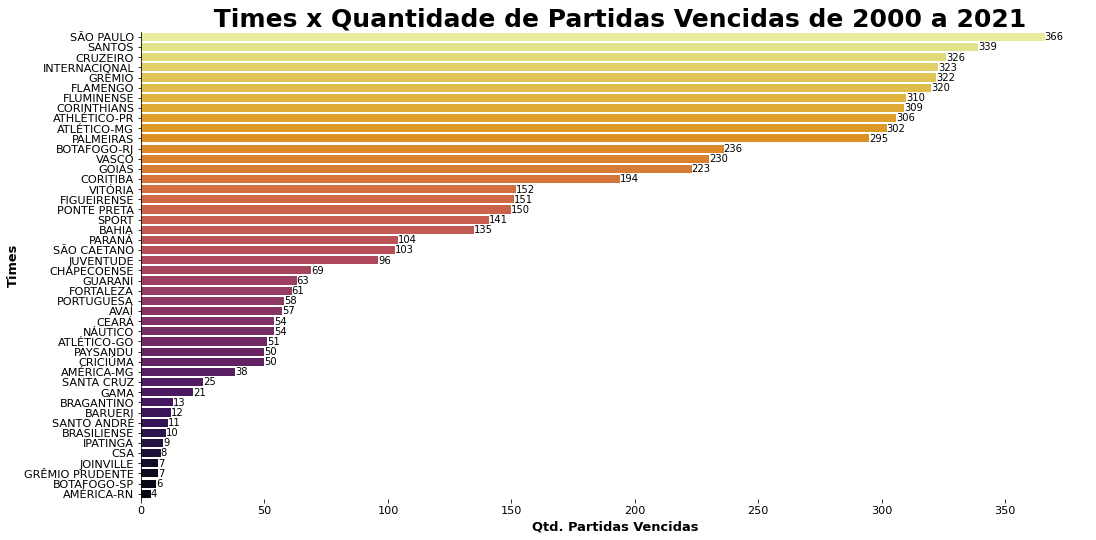

In [14]:
graficoContagemHorizontal(dados=vencedor,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

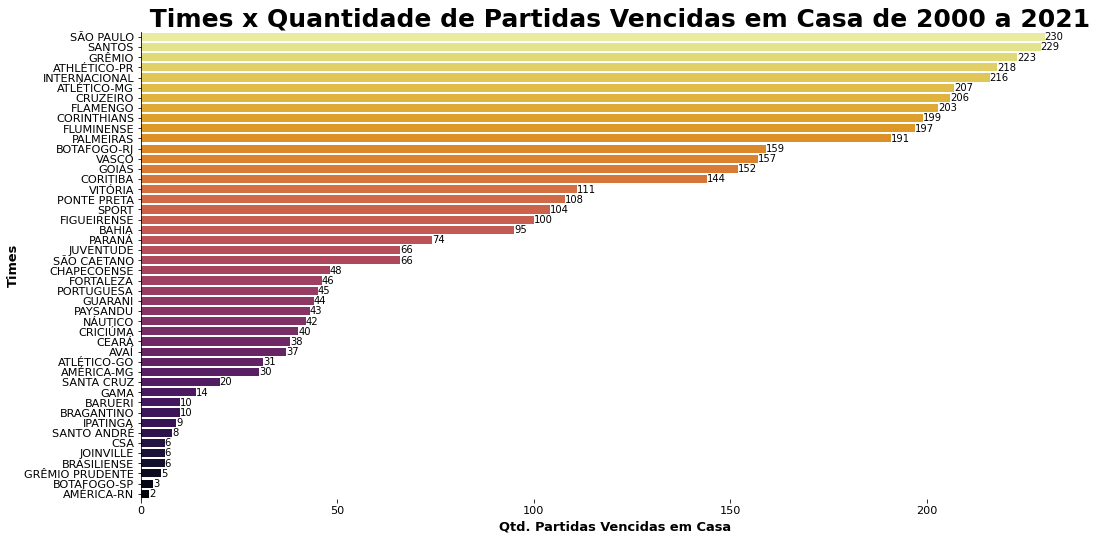

In [15]:
graficoContagemHorizontal(dados=vencedorCasa,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas em Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas em Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

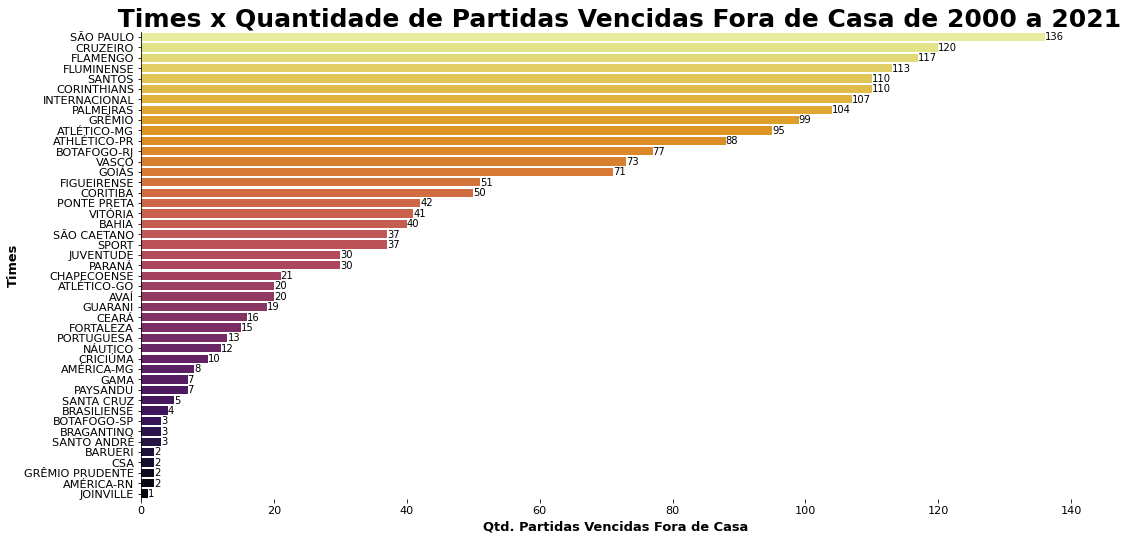

In [16]:
graficoContagemHorizontal(dados=vencedorVisitante,y='winners',x='winner_count',hue=None,orientacaoFigura='h',palette='inferno_r',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas Fora de Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas Fora de Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

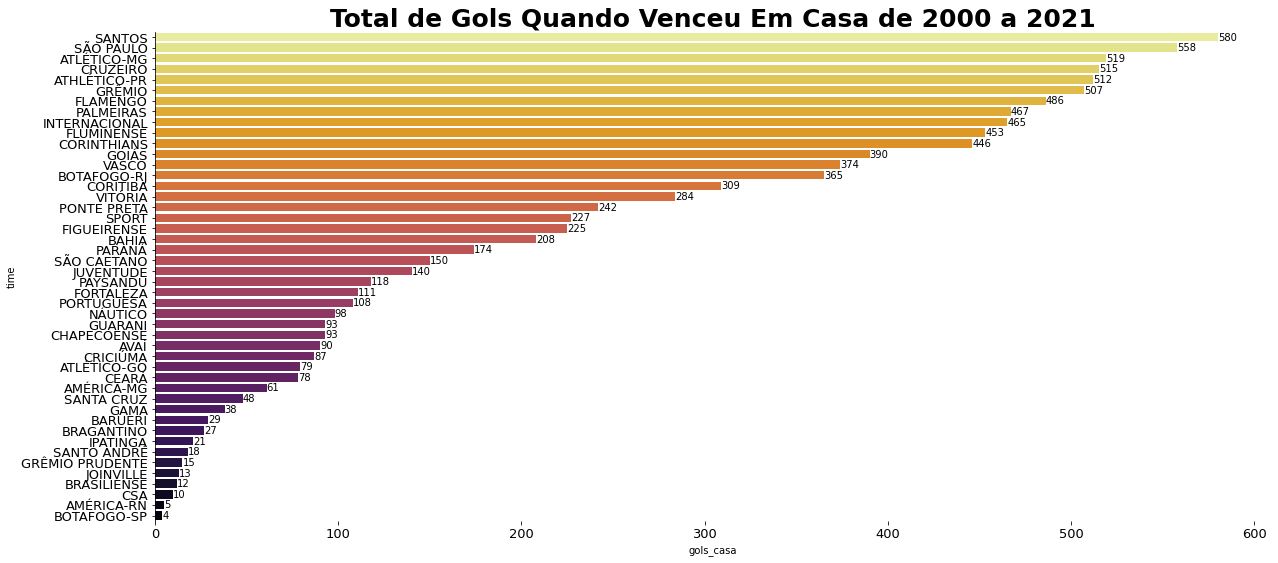

In [17]:
graficoContagemHorizontal(dados=golsMandante,y='time',x='gols_casa',hue=None,orientacaoFigura='h',palette='inferno_r',tamanhoFigura=(20,9),titulo='Total de Gols Quando Venceu Em Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=13)

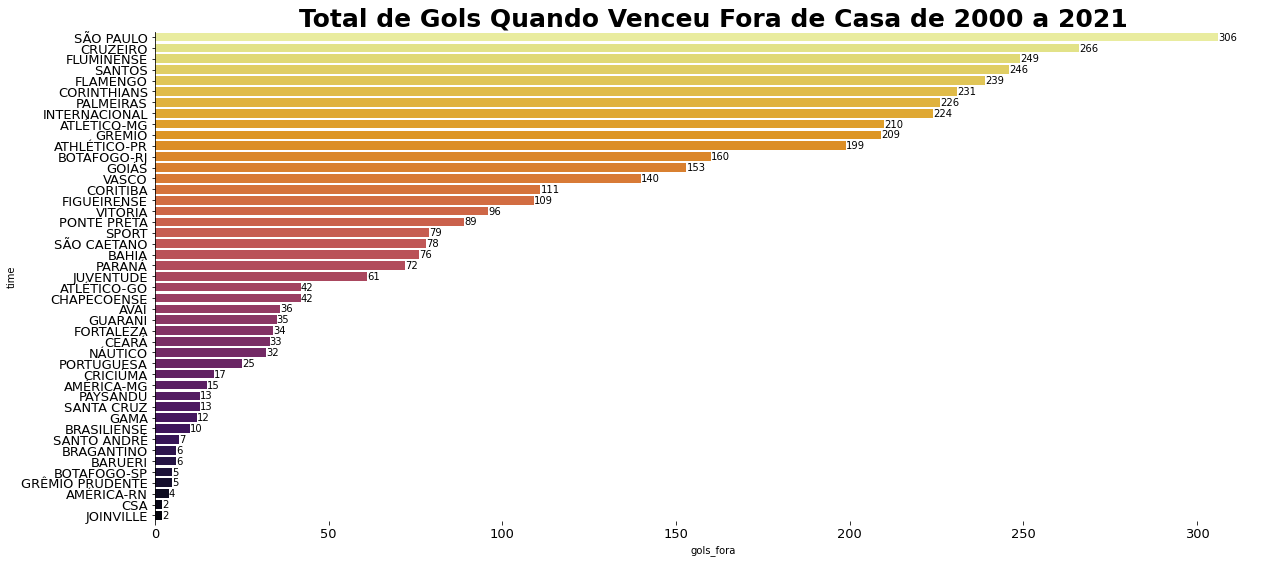

In [18]:
graficoContagemHorizontal(dados=golsVisitante,y='time',x='gols_fora',hue=None,orientacaoFigura='h',palette='inferno_r',tamanhoFigura=(20,9),titulo='Total de Gols Quando Venceu Fora de Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=13)

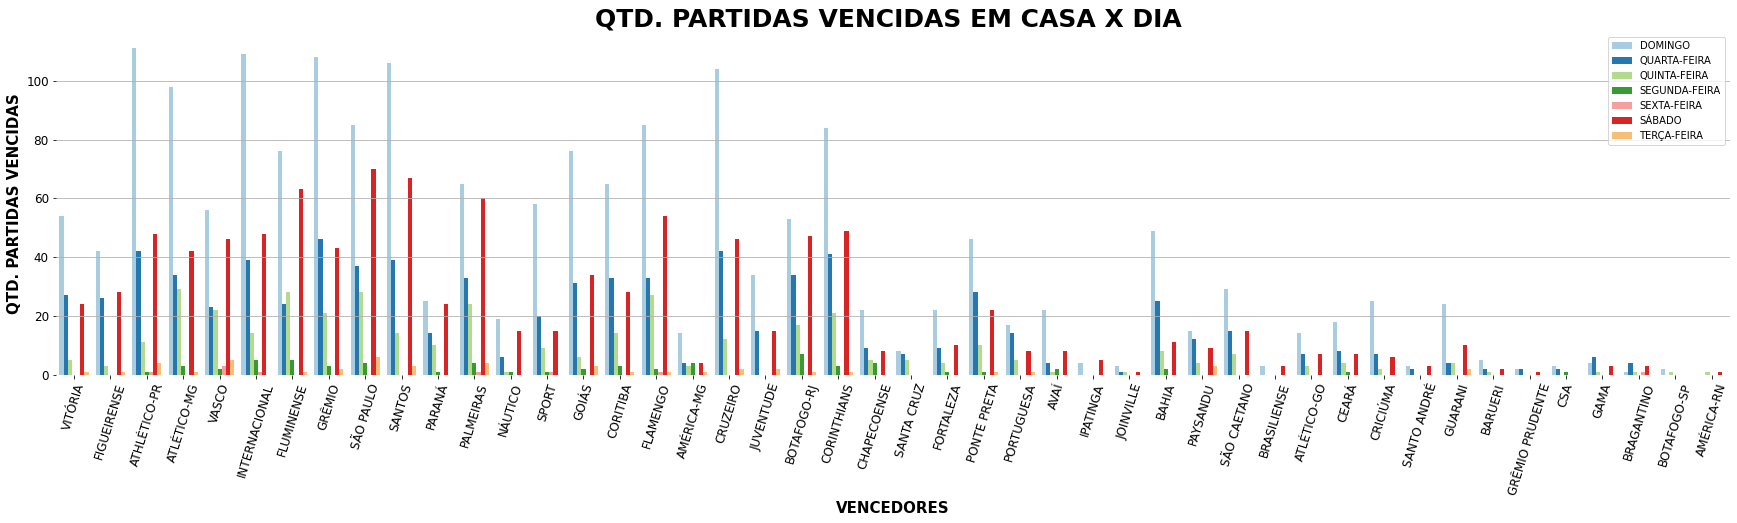

In [19]:
homeWinnersDia = homeWinners[['Vencedor','Dia']].sort_values('Dia',ascending=True)
fig, ax = plt.subplots(figsize=(30,6.3))
plt.grid(axis='y')
sns.countplot(data=homeWinnersDia,x='Vencedor',hue='Dia',palette='Paired',dodge=True,saturation=0.9)
for axis in ['top','right','left','bottom']:
  ax.spines[axis].set_color(None)
plt.title('QTD. PARTIDAS VENCIDAS EM CASA X DIA ',fontdict={'fontsize':25,'fontweight':'semibold'})
plt.legend(loc='upper right')
plt.xticks(rotation=73)
plt.tick_params(labelsize=12)
plt.xlabel('VENCEDORES',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.ylabel('QTD. PARTIDAS VENCIDAS',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()

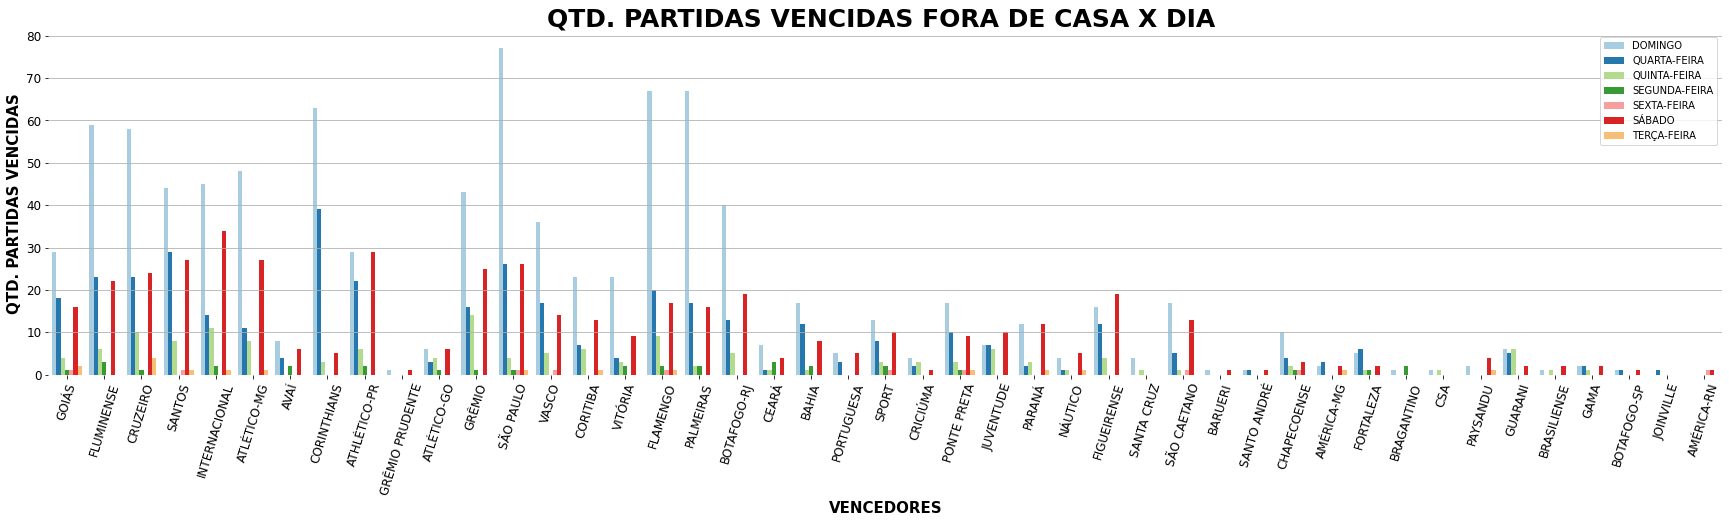

In [20]:
awayWinnersDia = awayWinners[['Vencedor','Dia']].sort_values('Dia',ascending=True)
fig, ax = plt.subplots(figsize=(30,6.3))
sns.countplot(data=awayWinnersDia,x='Vencedor',hue='Dia',palette='Paired',dodge=True,saturation=0.9)
plt.grid(axis='y')
for axis in ['top','right','left','bottom']:
  ax.spines[axis].set_color(None)
plt.title('QTD. PARTIDAS VENCIDAS FORA DE CASA X DIA ',fontdict={'fontsize':25,'fontweight':'semibold'})
plt.legend(loc='upper right')
plt.xticks(rotation=73)
plt.tick_params(labelsize=12)
plt.xlabel('VENCEDORES',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.ylabel('QTD. PARTIDAS VENCIDAS',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()

In [21]:
full_data2015fwd = full_data.loc[full_data['Data'] > datetime(2015,1,1)]
full_data2015fwd.drop(['Precisão de passe'],axis=1,inplace=True)
full_data2015fwd.dropna(axis=0)
full_data2015fwd = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Vencedor','Mandante Placar','Visitante Placar','Posse de bola',
                  'Cartões amarelos','Cartões vermelhos','Passes']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
full_data2015fwd['Posse de bola']

6039     50%
6040     50%
6041     45%
6042     55%
6043     74%
        ... 
10605    53%
10606    56%
10607    44%
10608    56%
10609    44%
Name: Posse de bola, Length: 4571, dtype: object

In [26]:
lista = []
for linha in full_data2015fwd['Posse de bola'] : 
  lista.append(str(linha).replace('%',''))
full_data2015fwd['Posse de bola'] = lista
full_data2015fwd['Posse de bola'] = pd.to_numeric(full_data2015fwd['Posse de bola'],downcast='integer',errors='coerce')
posseBolaMandante = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Posse de bola']].drop_duplicates(subset='ID',keep='first')
posseBolaMandante = posseBolaMandante[['Mandante_x','Posse de bola']]
posseMandante = pd.DataFrame()
posseMandante['Time'] = posseBolaMandante.groupby('Mandante_x').mean().round().index
posseMandante['ball_possession'] = posseBolaMandante.groupby('Mandante_x').mean().round().values

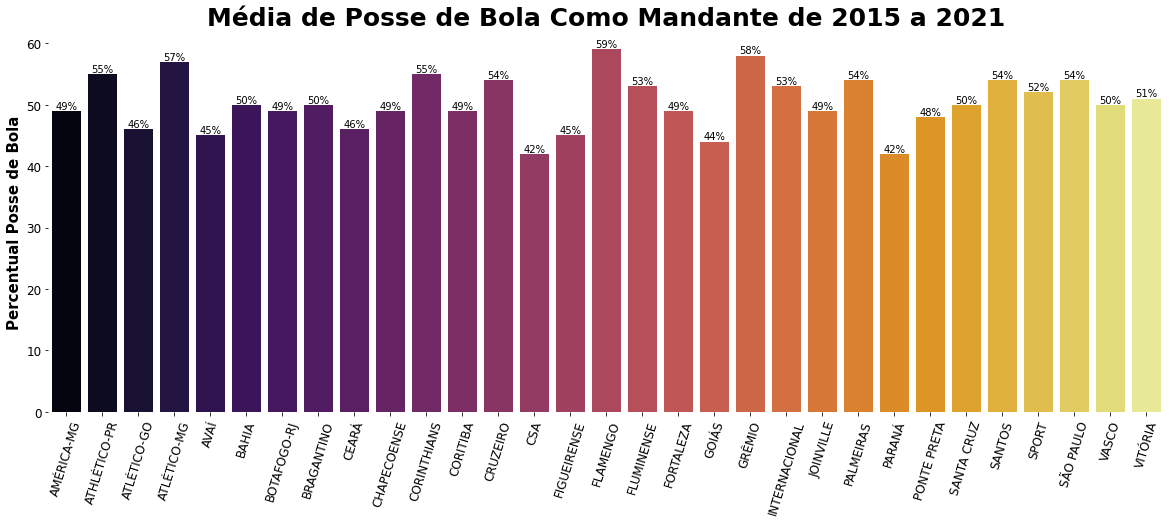

In [24]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=posseMandante,x='Time',y='ball_possession',palette='inferno')
for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}%'.format(altura),
            ha="center",va='bottom')
plt.xticks(rotation=73)
plt.title('Média de Posse de Bola Como Mandante de 2015 a 2021', fontdict={'fontsize':25,'fontweight':'semibold'})
plt.tick_params(labelsize=12)
plt.xlabel(None)
plt.ylabel('Percentual Posse de Bola',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()


In [27]:
lista = []
for linha in full_data2015fwd['Posse de bola'] : 
  lista.append(str(linha).replace('%',''))
full_data2015fwd['Posse de bola'] = lista
full_data2015fwd['Posse de bola'] = pd.to_numeric(full_data2015fwd['Posse de bola'],downcast='integer',errors='coerce')
posseBolaVisitante = full_data2015fwd[['ID','Data','Mandante_x','Visitante','Posse de bola']].drop_duplicates(subset='ID',keep='last')
posseBolaVisitante = posseBolaVisitante[['Visitante','Posse de bola']]
posseVisitante = pd.DataFrame()
posseVisitante['Time'] = posseBolaVisitante.groupby('Visitante').mean().round().index
posseVisitante['ball_possession'] = posseBolaVisitante.groupby('Visitante').mean().round().values

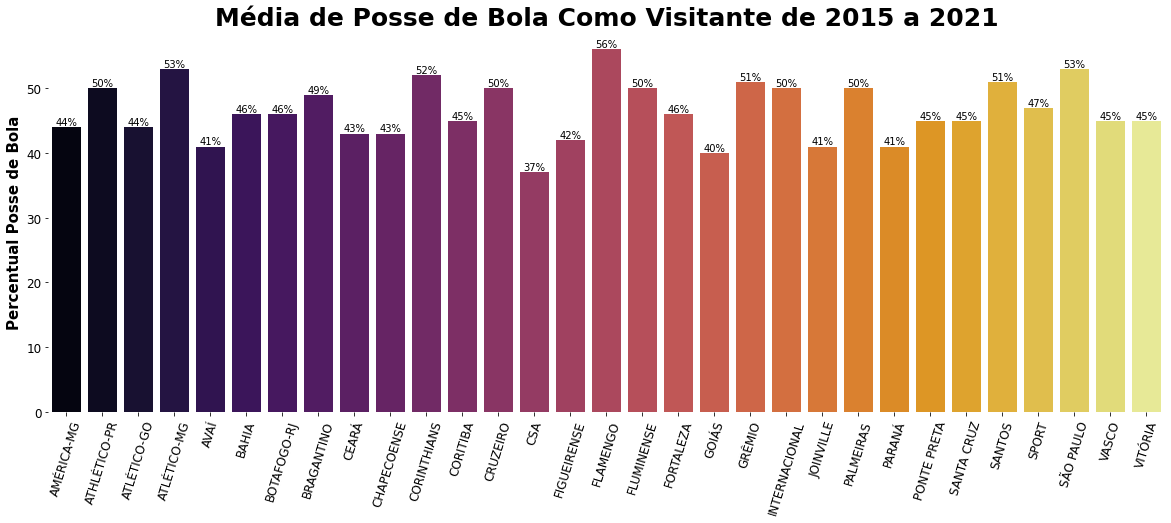

In [29]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=posseVisitante,x='Time',y='ball_possession',palette='inferno')
for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}%'.format(altura),
            ha="center",va='bottom')
plt.xticks(rotation=73)
plt.title('Média de Posse de Bola Como Visitante de 2015 a 2021', fontdict={'fontsize':25,'fontweight':'semibold'})
plt.tick_params(labelsize=12)
plt.xlabel(None)
plt.ylabel('Percentual Posse de Bola',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()

In [47]:
passeMandante = full_data2015fwd[['ID','Passes','Mandante_x','Visitante','Vencedor']].drop_duplicates(subset='ID',keep='first')
passeMandante = passeMandante[['Mandante_x','Passes']]
passesMandante = pd.DataFrame()
passesMandante['Time'] = passeMandante.groupby('Mandante_x').mean().round().index
passesMandante['ball_pass'] = passeMandante.groupby('Mandante_x').mean().round().values

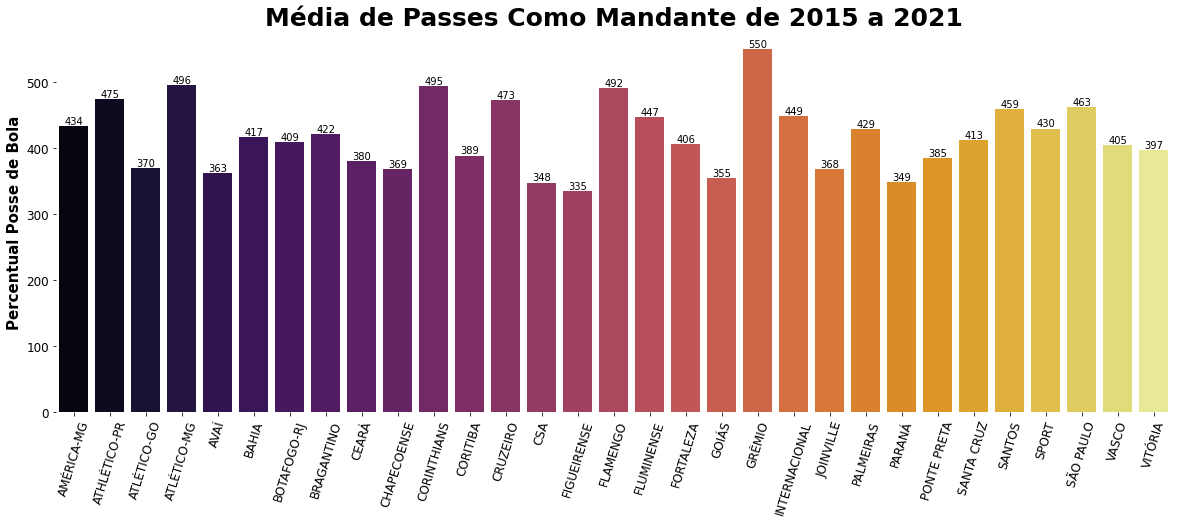

In [50]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=passesMandante,x='Time',y='ball_pass',palette='inferno')
for axis in ['top', 'right', 'left','bottom']:
    ax.spines[axis].set_color(None)
for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}'.format(altura),
            ha="center",va='bottom')
plt.xticks(rotation=73)
plt.title('Média de Passes Como Mandante de 2015 a 2021', fontdict={'fontsize':25,'fontweight':'semibold'})
plt.tick_params(labelsize=12)
plt.xlabel(None)
plt.ylabel('Percentual Posse de Bola',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.show()